# Polynomial Freeform

Note this is the optimized example in the Optimization section of the example gallery.

In [1]:
import numpy as np

from optiland import optic

We define a singlet lens, which has a freeform as its first surface.

The freeform surface is defined as:

$z(x, y) = \frac{r^2}{R \cdot (1 + \sqrt{(1 - (1 + k) \cdot r^2 / R^2)})} + \sum\limits_{i}\sum\limits_{j}{C_{i, j} \cdot x^i \cdot y^j}$

where $x$ and $y$ are the local surface coordinates, $r^2 = x^2 + y^2$, $R$ is the radius of curvature, $k$ is the conic constant and $C_{i, j}$ is the polynomial coefficient for indices $i, j$.

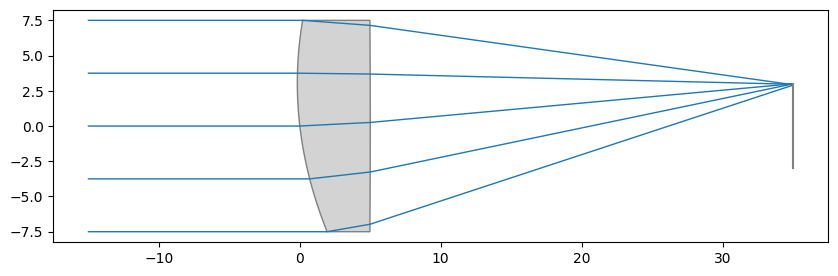

In [2]:
lens = optic.Optic()

# add surfaces
lens.add_surface(index=0, thickness=np.inf)

# define coefficients in 3x3 matrix
coefficients = np.array(
    [
        [-4.56505091e-06, -1.15752084e-01, 1.40048185e-02],
        [-7.70890849e-09, 1.59140219e-07, -7.31428964e-09],
        [1.39404472e-02, -1.41760901e-05, 9.63852768e-07],
    ],
)
lens.add_surface(
    index=1,
    radius=100,
    thickness=5,
    surface_type="polynomial",  # <-- surface_type='polynomial'
    is_stop=True,
    material="SF11",
    coefficients=coefficients,
)

lens.add_surface(index=2, thickness=30, radius=-1000)
lens.add_surface(index=3)

# set aperture
lens.set_aperture(aperture_type="EPD", value=15)

# add field
lens.set_field_type(field_type="angle")
lens.add_field(y=0)

# add wavelength
lens.add_wavelength(value=0.55, is_primary=True)

# draw lens
lens.draw(num_rays=5)